In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_train[0].shape

(28, 28)

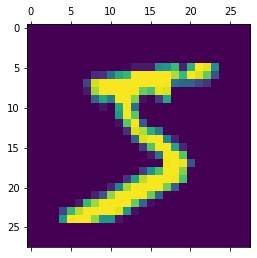

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train/255
X_test = X_test/255

### Flatten the data set

we want a dataset having shape of (number of elements, width * lenght)

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
X_test_flattened.shape

(10000, 784)

In [11]:
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4908 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3063 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2853 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2746 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2676 - accuracy: 0.9262


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2638 - accuracy: 0.9266


[0.2638123631477356, 0.9265999794006348]

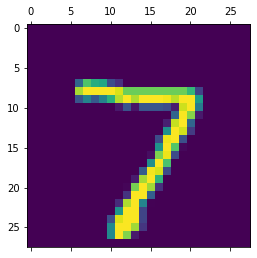

In [15]:
plt.matshow(X_test[0])

In [16]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.1721677e-05, 9.5156646e-11, 4.2893495e-05, 8.7770820e-03,
       6.2979223e-07, 8.9005807e-05, 1.0199948e-09, 7.8644818e-01,
       6.4042237e-05, 8.1267953e-04], dtype=float32)

In [17]:
np.argmax(y_pred[0])

7

In [18]:
y_predicted_label = [np.argmax(i) for i in y_pred]
y_predicted_label[:3]

[7, 2, 1]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)

In [20]:
import seaborn as sn

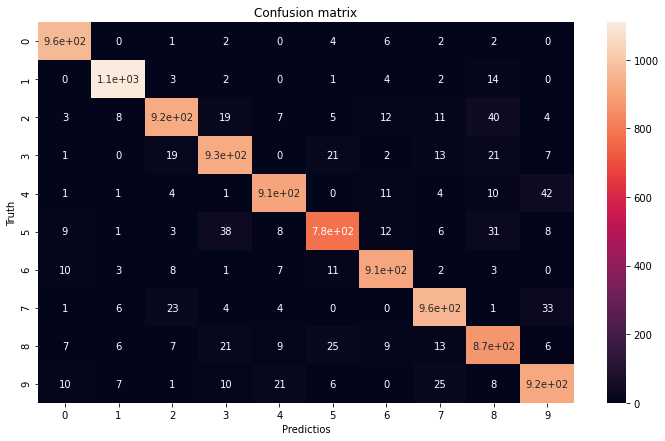

In [21]:
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predictios")
plt.ylabel("Truth")
plt.show()

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/sgd", histogram_freq=1)

model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [32]:
model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 1.8633 - accuracy: 0.5688
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.9055 - accuracy: 0.8275
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6067 - accuracy: 0.8640
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4952 - accuracy: 0.8791
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4370 - accuracy: 0.8873


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3972 - accuracy: 0.8980


[0.39718201756477356, 0.8980000019073486]

In [26]:
y_pred = model.predict(X_test_flattened)
y_pred[5]

array([9.2901801e-06, 1.6884723e-01, 1.5549064e-03, 2.1486580e-03,
       1.3163686e-04, 3.0070543e-04, 1.1501018e-04, 2.4978220e-03,
       1.3666451e-03, 6.2718987e-04], dtype=float32)

In [27]:
np.argmax(y_pred[5])

1